In [21]:
import numpy as np
import pandas as pd
import missingno as mn
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Reading and basic data info

In [22]:
data = pd.read_csv('../input/weather-dataset-rattle-package/weatherAUS.csv')
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Checking null values in table columns using missingno

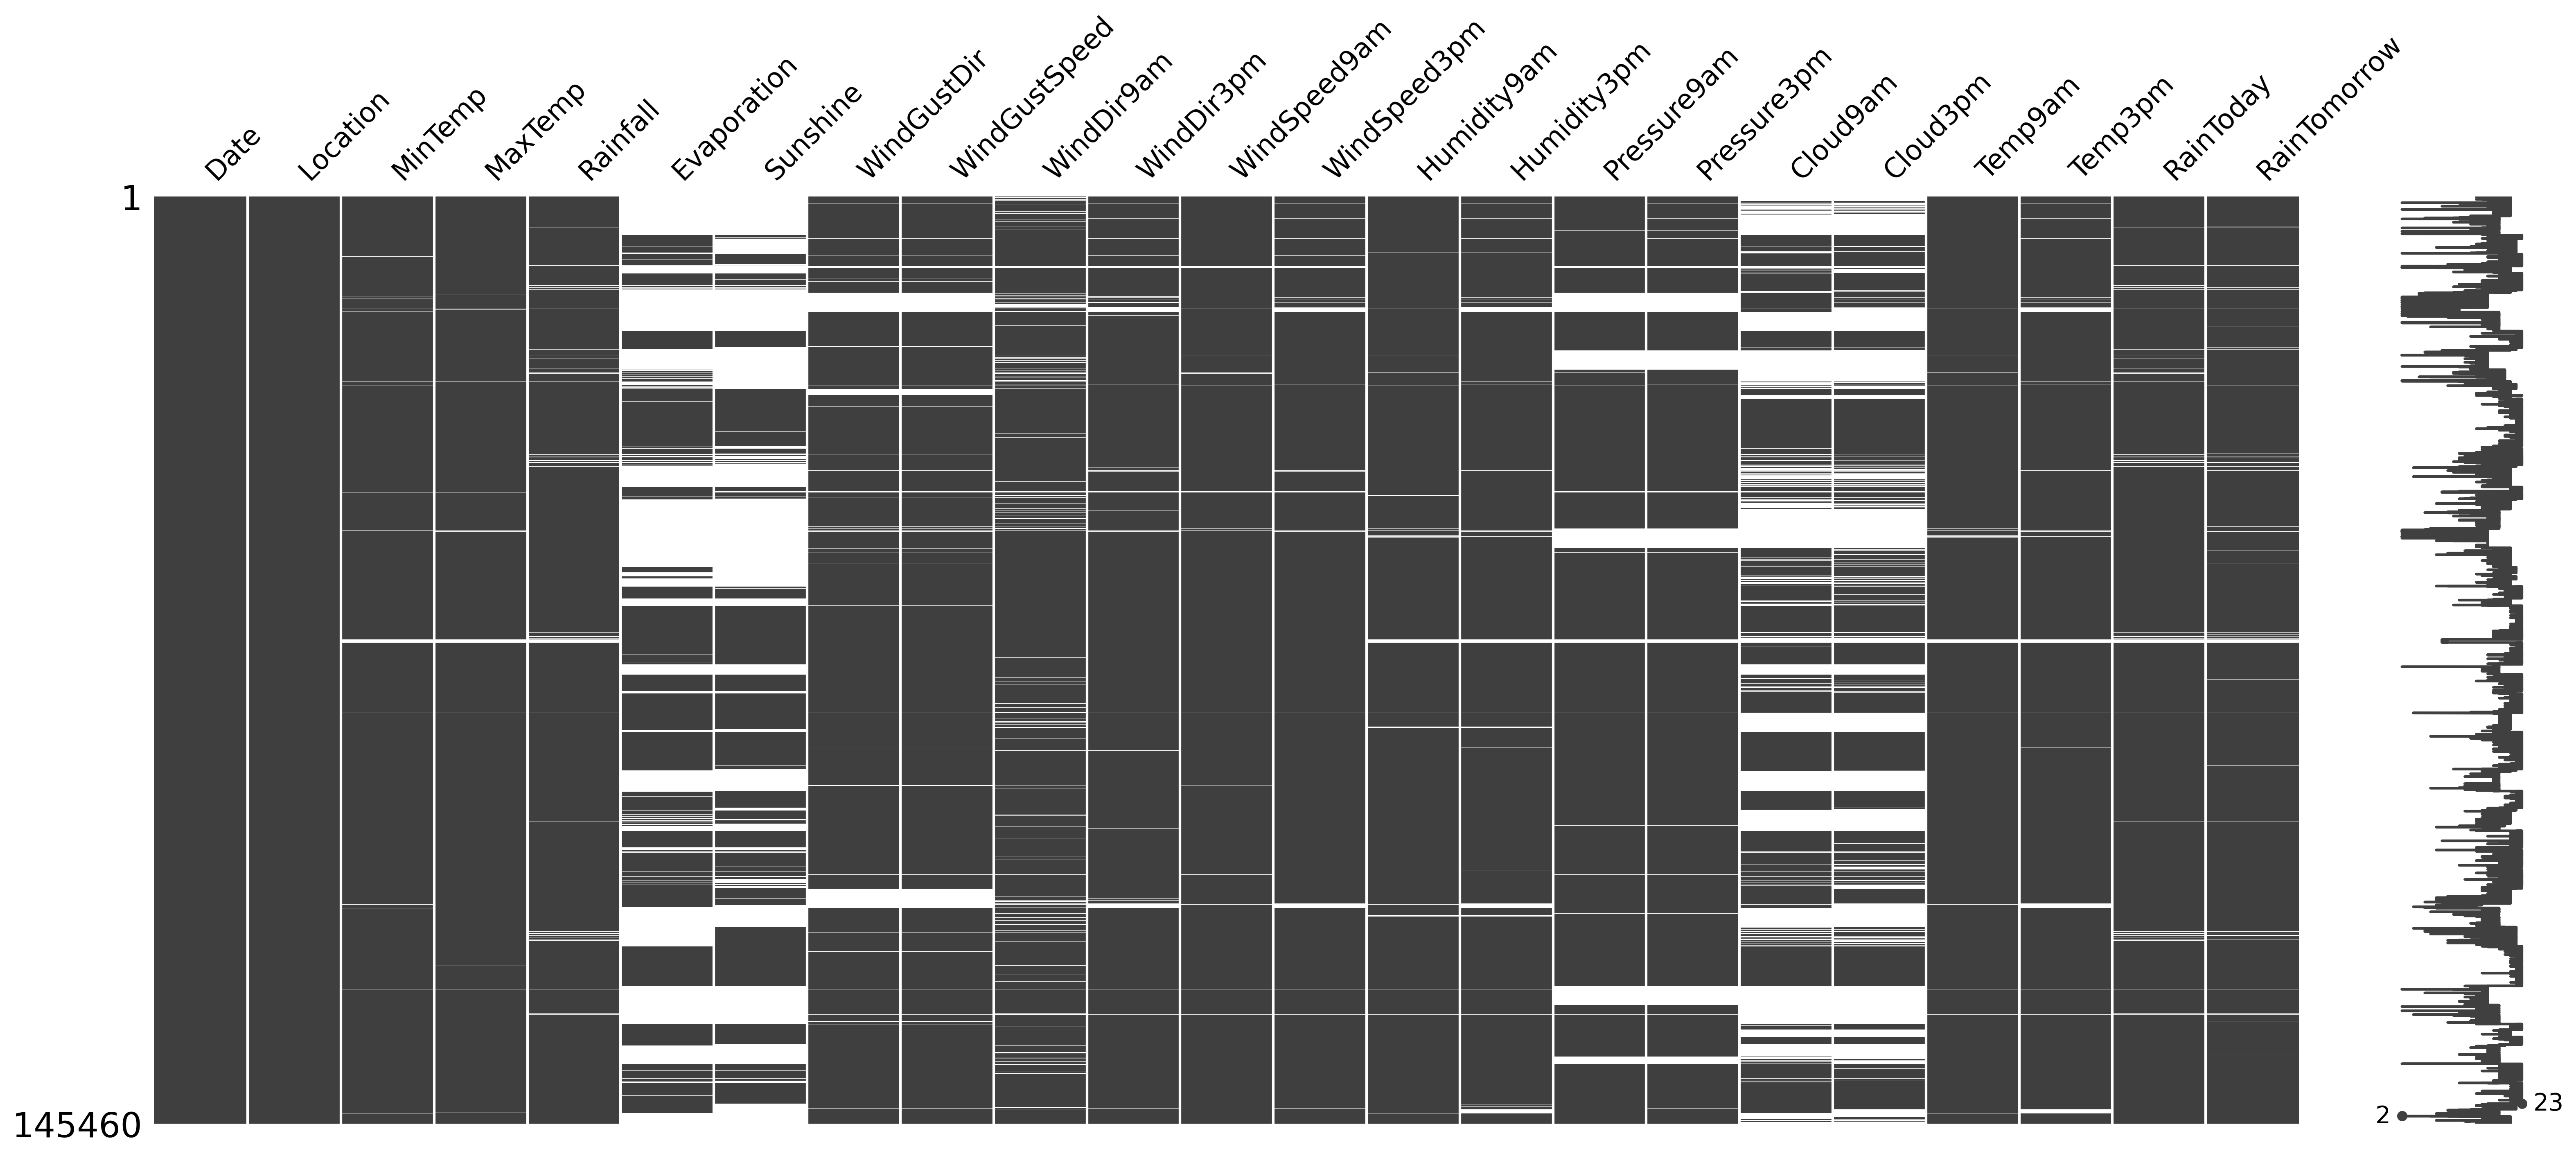

In [24]:
mn.matrix(data)
plt.show()

In [25]:
def scat(pos, x, y, title):
    plt.subplot(8,2,pos)
    plt.scatter(y,x,s=5,alpha=0.3)
    plt.title(title)

## Plotting current day rainfall vs all the features to know which features to select

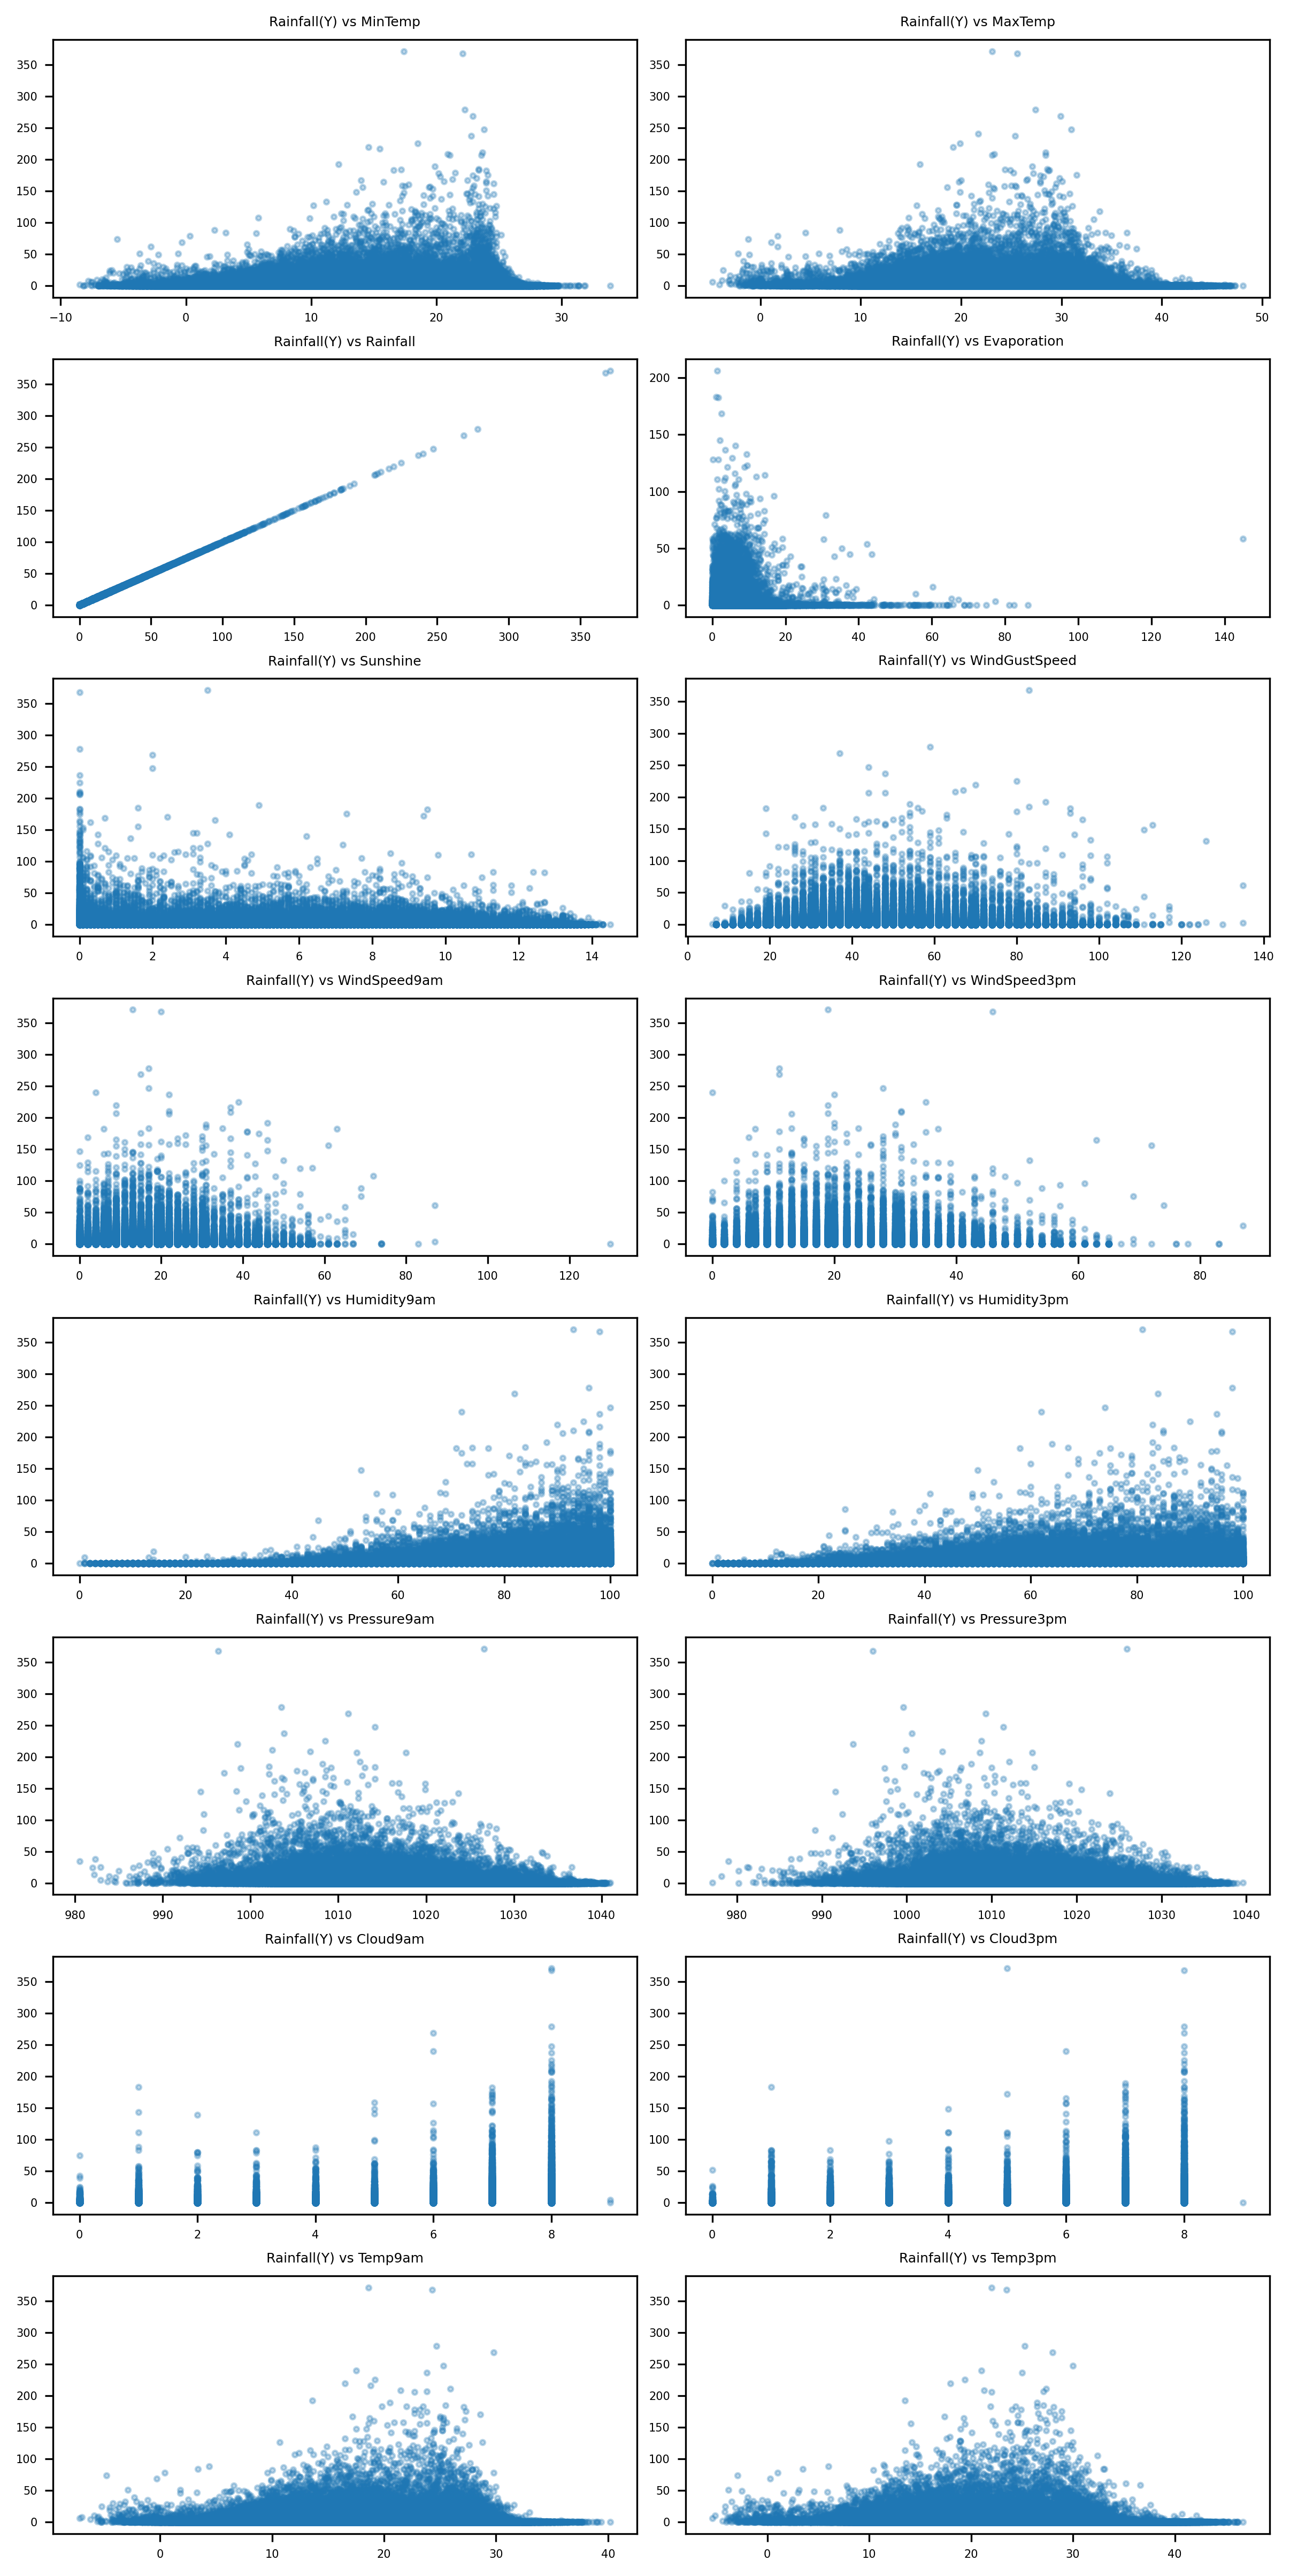

In [26]:
mpl.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 5})
plt.figure(figsize=(8, 16))
to_plot = data.columns.values.tolist()[2:-2]
for val in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    to_plot.remove(val)
i = 1
for y in to_plot:
    scat(i, data['Rainfall'], data[y], f'Rainfall(Y) vs {y}')
    i+=1
plt.tight_layout()
plt.show()

In [27]:
useful_data = ['Location','MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']

In [28]:
chosen_data = data[useful_data]
chosen_data.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
5,Albury,14.6,29.7,0.2,NaN,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No
6,Albury,14.3,25.0,0.0,NaN,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No
7,Albury,7.7,26.7,0.0,NaN,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No
8,Albury,9.7,31.9,0.0,NaN,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,Yes
9,Albury,13.1,30.1,1.4,NaN,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,No


## Checking and dropping null values from the table

In [29]:
print(chosen_data.isna().sum())
len(chosen_data)

Location            0
MinTemp          1485
MaxTemp          1261
Rainfall         3261
Evaporation     62790
WindSpeed9am     1767
WindSpeed3pm     3062
Humidity9am      2654
Humidity3pm      4507
Pressure9am     15065
Pressure3pm     15028
Temp9am          1767
Temp3pm          3609
RainTomorrow     3267
dtype: int64


145460

In [30]:
chosen_data = chosen_data.dropna()
chosen_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78684 entries, 6049 to 143186
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      78684 non-null  object 
 1   MinTemp       78684 non-null  float64
 2   MaxTemp       78684 non-null  float64
 3   Rainfall      78684 non-null  float64
 4   Evaporation   78684 non-null  float64
 5   WindSpeed9am  78684 non-null  float64
 6   WindSpeed3pm  78684 non-null  float64
 7   Humidity9am   78684 non-null  float64
 8   Humidity3pm   78684 non-null  float64
 9   Pressure9am   78684 non-null  float64
 10  Pressure3pm   78684 non-null  float64
 11  Temp9am       78684 non-null  float64
 12  Temp3pm       78684 non-null  float64
 13  RainTomorrow  78684 non-null  object 
dtypes: float64(12), object(2)
memory usage: 9.0+ MB


## Converting location and RainTomorrow data to classes instead of text using labelencoder

In [31]:
le = preprocessing.LabelEncoder()
chosen_data['Location'] = le.fit_transform(chosen_data['Location'].values)
chosen_data['RainTomorrow'] = le.fit_transform(chosen_data['RainTomorrow'].values)
chosen_data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
6049,7,17.9,35.2,0.0,12.0,6.0,20.0,20.0,13.0,1006.3,1004.4,26.6,33.4,0
6050,7,18.4,28.9,0.0,14.8,19.0,19.0,30.0,8.0,1012.9,1012.1,20.3,27.0,0
6052,7,19.4,37.6,0.0,10.8,30.0,15.0,42.0,22.0,1012.3,1009.2,28.7,34.9,0
6053,7,21.9,38.4,0.0,11.4,6.0,6.0,37.0,22.0,1012.7,1009.1,29.1,35.6,0
6054,7,24.2,41.0,0.0,11.2,17.0,13.0,19.0,15.0,1010.7,1007.4,33.6,37.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143182,12,22.6,33.6,0.0,8.0,17.0,26.0,53.0,40.0,1020.1,1015.8,26.2,33.0,0
143183,12,17.4,30.7,0.0,10.8,22.0,19.0,28.0,42.0,1021.2,1016.5,21.3,30.0,0
143184,12,16.2,31.6,0.0,9.4,26.0,26.0,27.0,26.0,1020.4,1015.9,21.5,31.2,0
143185,12,13.3,32.0,0.0,5.8,15.0,22.0,73.0,28.0,1019.2,1015.0,22.1,31.0,0


In [32]:
X = chosen_data.iloc[:, :-1]
y = chosen_data.iloc[:,-1]
Xn = np.ones((X.shape[0],X.shape[1]+1))
Xn[:,1:] = X
X = Xn

## feature normalization for gradient decent

In [33]:
mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X[:,1:] = (X[:,1:]-mu[1])/sigma[1]

In [34]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def hypothesis(theta, x):
    return sigmoid(np.dot(x, theta))

In [35]:
alpha = 0.01
theta = theta = np.zeros((X.shape[1],1))
iterations = 3000

## Splitting into test and train datasets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
m = len(X_train)
y_train = y_train.values.reshape((y_train.shape[0],1))
y_test = y_test.values.reshape((y_test.shape[0],1))

## Running gradient descent manually

In [37]:
cost = np.zeros((iterations, 1))
for i in range(iterations):
    theta = theta - (alpha*np.dot(X_train.T, (hypothesis(theta, X_train) - y_train)))/m
theta

array([[ 0.01838801],
       [-0.17637883],
       [ 0.67966727],
       [-0.28827569],
       [ 1.52186064],
       [-0.1013994 ],
       [ 1.06792683],
       [ 0.79525057],
       [ 1.8924788 ],
       [ 5.85502765],
       [-0.32252954],
       [-0.29893239],
       [ 0.29649453],
       [-0.53580241]])

## checking accuracy

In [38]:
y_pred = hypothesis(theta, X_test)
total = len(y_pred)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
accurate = (y_pred == y_test).sum()
accuracy = accurate/total
accuracy*100

78.56427636139567

In [39]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,1.614259,1.096238,1.540256,-1.726446,0.134200,-0.605830,1.931414,2.142851,2.565725,104.763799,104.763799,1.445109,1.371106
1,1.0,0.451355,0.250490,1.857411,-1.768733,-0.521255,-0.817267,0.239918,2.460007,2.142851,105.567259,105.355822,1.096238,1.508540
2,1.0,-1.663015,0.028481,0.472499,-1.747590,-1.663015,-1.768733,0.557074,6.794465,6.160154,105.715265,105.292391,0.218775,0.430212
3,1.0,-1.345859,0.313921,1.149097,-1.747590,-1.049847,-1.345859,-0.817267,4.574377,4.362940,105.609547,105.345250,1.022235,1.106810
4,1.0,1.508540,-0.056094,0.620505,2.185139,-0.880698,0.768511,1.719977,7.534495,5.525843,105.334679,105.503828,0.134200,0.419640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52713,1.0,0.028481,-0.373249,0.398496,-1.768733,-1.113279,-0.605830,-0.394393,8.274524,7.745932,105.789268,105.641262,-0.098381,-0.024378
52714,1.0,0.134200,-0.034950,1.751693,-1.768733,-1.155566,-0.182956,1.191385,4.891532,0.874229,104.943520,104.573505,0.631077,1.624831
52715,1.0,-0.711548,0.895373,1.635402,-1.768733,-1.113279,-0.394393,1.191385,6.160154,8.380243,105.197245,104.996379,1.381678,0.779083
52716,1.0,-1.028704,-1.282428,0.208203,-1.768733,-1.324716,-0.182956,-1.134422,5.948717,1.931414,107.153037,106.687875,-0.753836,0.123628


## Logistic regression using sklearn

In [40]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(max_iter=3000)
logisticRegr.fit(X_train, y_train.ravel())
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print(score)

0.8408303165678195
